<a href="https://colab.research.google.com/github/dindahanifa/analisis_pengujian/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =====================================
# 🚀 Percepatan & Pengukuran Eksekusi
# =====================================

# 1️⃣ --- Cek apakah GPU aktif di Colab ---
import os
gpu_info = os.popen('nvidia-smi').read()
if "failed" in gpu_info:
    print("⚠️ GPU belum aktif. Aktifkan via Runtime > Change runtime type > GPU")
else:
    print("✅ GPU aktif dan siap dipakai!")
    print(gpu_info.split('\n')[0])

# 2️⃣ --- Cara 1: Pakai %%time (khusus untuk cell di Colab) ---
# Jalankan ini di satu cell Colab terpisah:
# %%time
# for i in range(10_000_000):
#     _ = i ** 2

# 3️⃣ --- Cara 2: Pakai time.time() manual ---
import time

print("\n⏱️ Mengukur waktu dengan time.time() ...")
start = time.time()
for i in range(10_000_000):
    _ = i ** 2
end = time.time()
print(f"Waktu eksekusi loop biasa: {end - start:.3f} detik")

# 4️⃣ --- Cara 3: Pakai Numba (JIT Compiler) untuk mempercepat Python loop ---
from numba import njit

@njit
def fast_loop(n=10_000_000):
    total = 0
    for i in range(n):
        total += i ** 2
    return total

print("\n⚡ Mengukur waktu dengan Numba (JIT Compilation)...")
start = time.time()
fast_loop()  # pertama kali akan kompilasi (lebih lambat)
end = time.time()
print(f"Pertama kali (kompilasi): {end - start:.3f} detik")

start = time.time()
fast_loop()  # eksekusi berikutnya super cepat
end = time.time()
print(f"Eksekusi berikutnya: {end - start:.3f} detik")

# 5️⃣ --- Cara 4: Gunakan operasi vectorized (NumPy) ---
import numpy as np

print("\n⚙️ Mengukur waktu dengan operasi vectorized NumPy ...")
start = time.time()
x = np.arange(10_000_000)
y = x ** 2  # super cepat tanpa loop manual
end = time.time()
print(f"Waktu eksekusi NumPy: {end - start:.3f} detik")

# 6️⃣ --- Bonus: Decorator otomatis untuk mengukur waktu fungsi ---
def timed(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"⏰ Fungsi '{func.__name__}' selesai dalam {end - start:.3f} detik")
        return result
    return wrapper

@timed
def contoh_fungsi():
    s = 0
    for i in range(5_000_000):
        s += i ** 2
    return s

print("\n🧩 Contoh fungsi dengan decorator otomatis:")
contoh_fungsi()

✅ GPU aktif dan siap dipakai!


⏱️ Mengukur waktu dengan time.time() ...
Waktu eksekusi loop biasa: 1.773 detik

⚡ Mengukur waktu dengan Numba (JIT Compilation)...
Pertama kali (kompilasi): 3.444 detik
Eksekusi berikutnya: 0.000 detik

⚙️ Mengukur waktu dengan operasi vectorized NumPy ...
Waktu eksekusi NumPy: 0.131 detik

🧩 Contoh fungsi dengan decorator otomatis:
⏰ Fungsi 'contoh_fungsi' selesai dalam 2.393 detik


41666654166667500000

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

In [9]:
import os

file_path = "breast cancer.csv"

if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the file is uploaded to your Colab environment.")
else:
    data = pd.read_csv(file_path)
    print("Preview data:")
    display(data.head())

    print("\nInfo kolom:")
    print(data.info())

    print("\nChecking for missing values:")
    print(data.isnull().sum())

    print("\nChecking for duplicate rows before dropping:")
    print(data.duplicated().sum())

    data.drop_duplicates(inplace=True)

    print("\nChecking for duplicate rows after dropping:")
    print(data.duplicated().sum())

    # Drop the 'id' column as requested
    if 'id' in data.columns:
      data.drop('id', axis=1, inplace=True)
      print("\n'id' column dropped.")
    else:
      print("\n'id' column not found in the dataframe.")


    # Keep only columns with 'mean' in their name and the 'diagnosis' column
    columns_to_keep = [col for col in data.columns if 'mean' in col or col == 'diagnosis']
    data = data[columns_to_keep]


    print("\nPreview data after dropping 'id' column and filtering columns:")
    display(data.head())

Preview data:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Info kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


**Split Data**

In [10]:
X = data.drop('diagnosis', axis=1) # Features
y = data['diagnosis'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
display(X_train.head())
print("Shape of X_test:", X_test.shape)
display(X_test.head())
print("Shape of y_train:", y_train.shape)
display(y_train.head())
print("Shape of y_test:", y_test.shape)
display(y_test.head())

Shape of X_train: (455, 10)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960


Shape of X_test: (114, 10)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782


Shape of y_train: (455,)


,diagnosis
68,B
181,M
63,B
248,B
60,B


Shape of y_test: (114,)


,diagnosis
204,B
70,M
131,M
431,B
540,B


In [11]:
X = data.drop('diagnosis', axis=1) # Features
y = data['diagnosis'] # Target variable

print("Preview of features (X):")
display(X.head())
print("\nPreview of target variable (y):")
display(y.head())

Preview of features (X):


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883



Preview of target variable (y):


,diagnosis
0,M
1,M
2,M
3,M
4,M


**Latih Model**

In [12]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

**Evaluasi Model**

Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.99      0.96        71
           M       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



<Axes: >

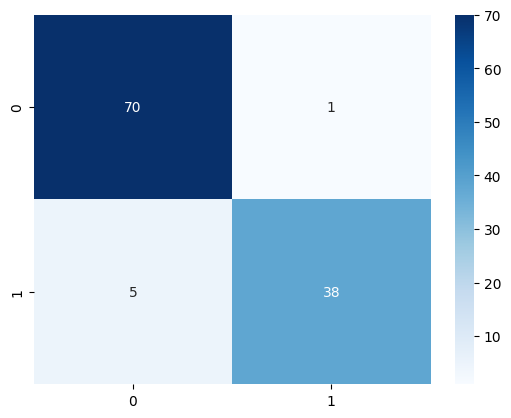

In [13]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

**Heatmap Korelasi**

**Visualizing Relationships Between Top Correlated Features**

In [14]:
# Convert 'diagnosis' column to numeric for correlation calculation
data['diagnosis_numeric'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Identify top correlated features with diagnosis
# We'll use the absolute value of correlation to get the top positive and negative correlations
correlation_with_diagnosis = data.corr(numeric_only=True)['diagnosis_numeric'].abs().sort_values(ascending=False)

# Exclude the diagnosis_numeric column itself from the list of top features
top_features = correlation_with_diagnosis[1:].head(5).index.tolist() # Get the top 5 features

# Drop the temporary numeric diagnosis column
data.drop('diagnosis_numeric', axis=1, inplace=True)

print("Top 5 features correlated with diagnosis:")
print(top_features)

Top 5 features correlated with diagnosis:
['concave points_mean', 'perimeter_mean', 'radius_mean', 'area_mean', 'concavity_mean']


/tmp/ipython-input-259784343.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_correlation.index, y=top_5_correlation.values, palette='viridis')


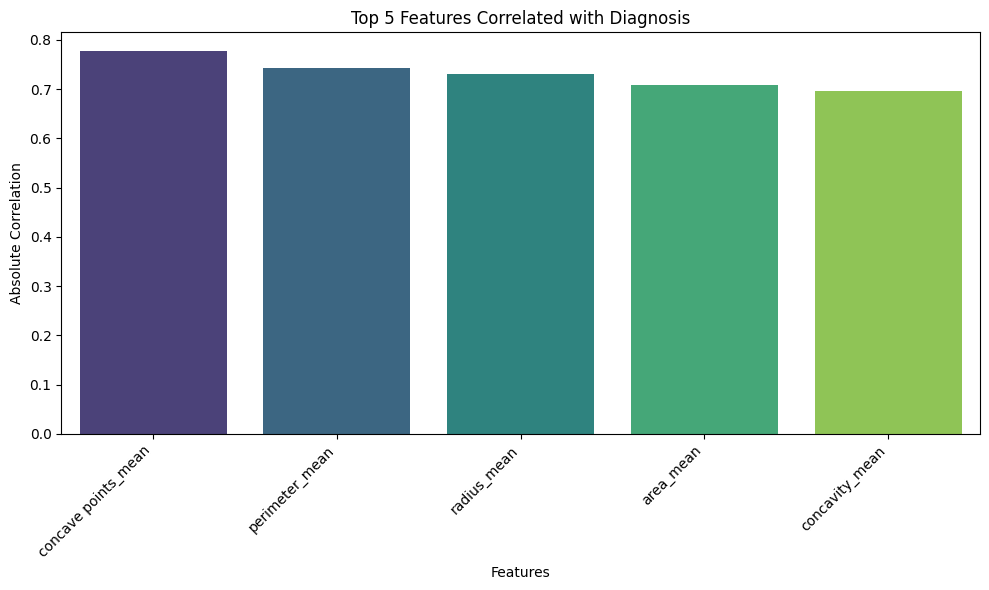

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Re-calculate correlation to include diagnosis_numeric
data['diagnosis_numeric'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
correlation_with_diagnosis = data.corr(numeric_only=True)['diagnosis_numeric'].abs().sort_values(ascending=False)

# Get the top 5 features (excluding diagnosis_numeric itself)
top_5_correlation = correlation_with_diagnosis[1:].head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_correlation.index, y=top_5_correlation.values, palette='viridis')
plt.title('Top 5 Features Correlated with Diagnosis')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Drop the temporary numeric diagnosis column
data.drop('diagnosis_numeric', axis=1, inplace=True)

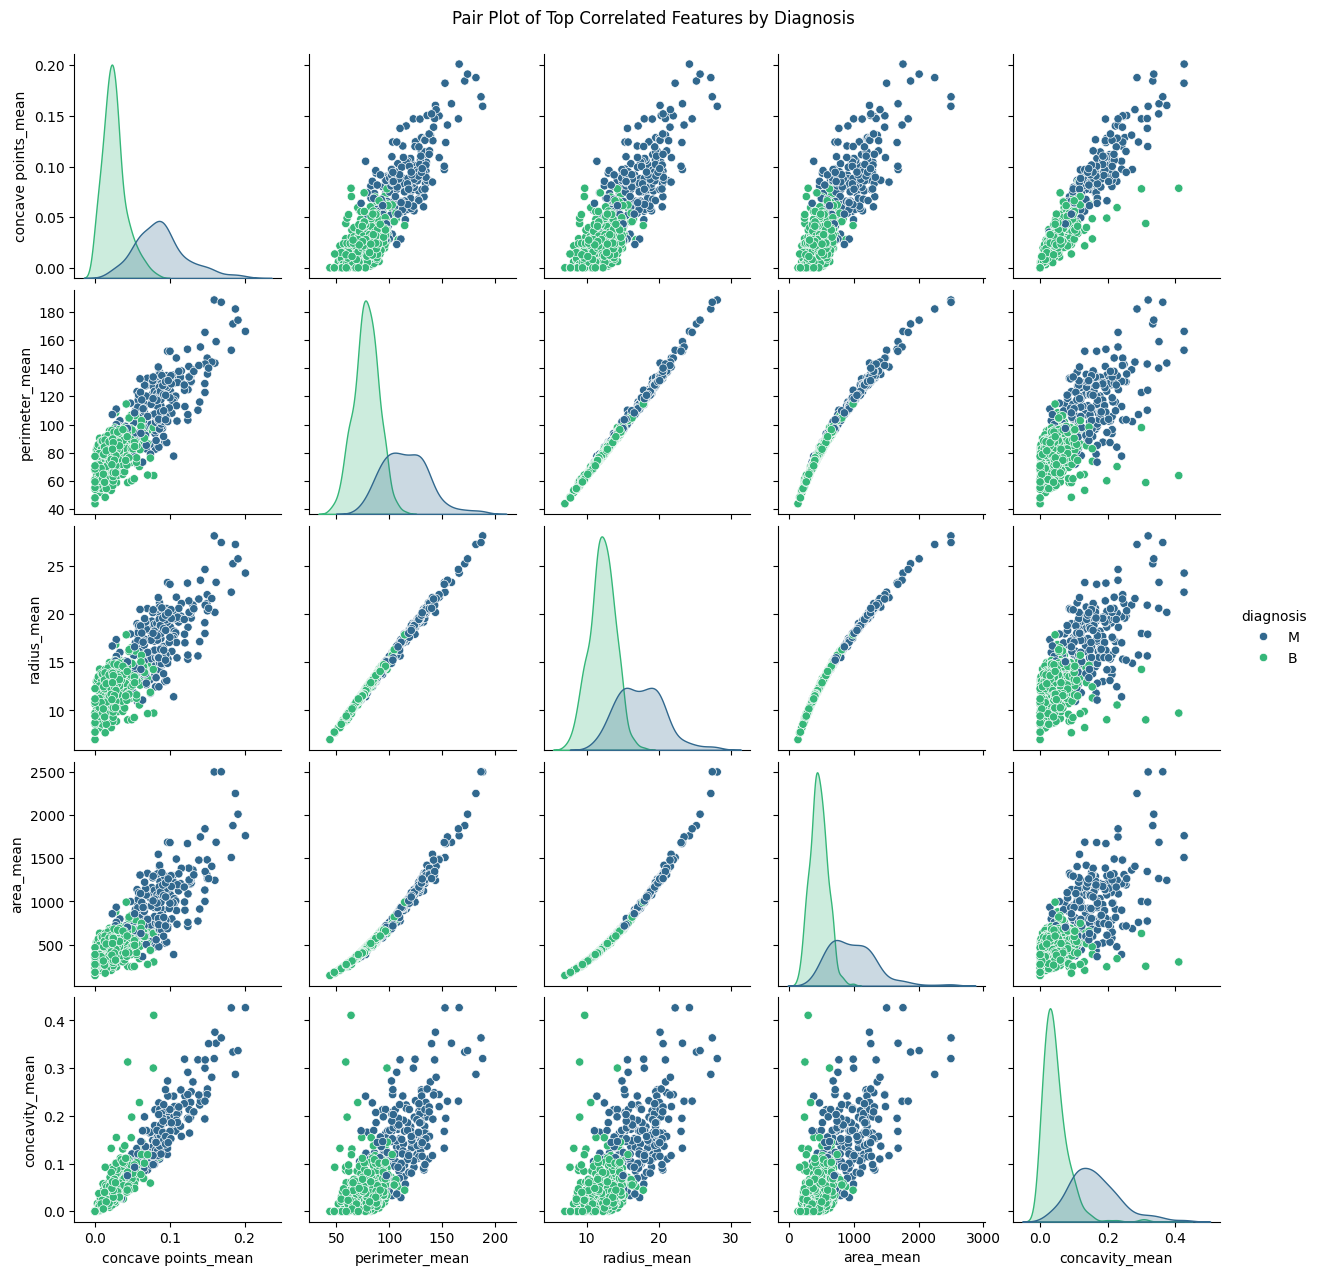

In [16]:
# Generate scatter plots for pairs of top features, colored by diagnosis
sns.pairplot(data, vars=top_features, hue='diagnosis', palette='viridis')
plt.suptitle('Pair Plot of Top Correlated Features by Diagnosis', y=1.02)
plt.show()

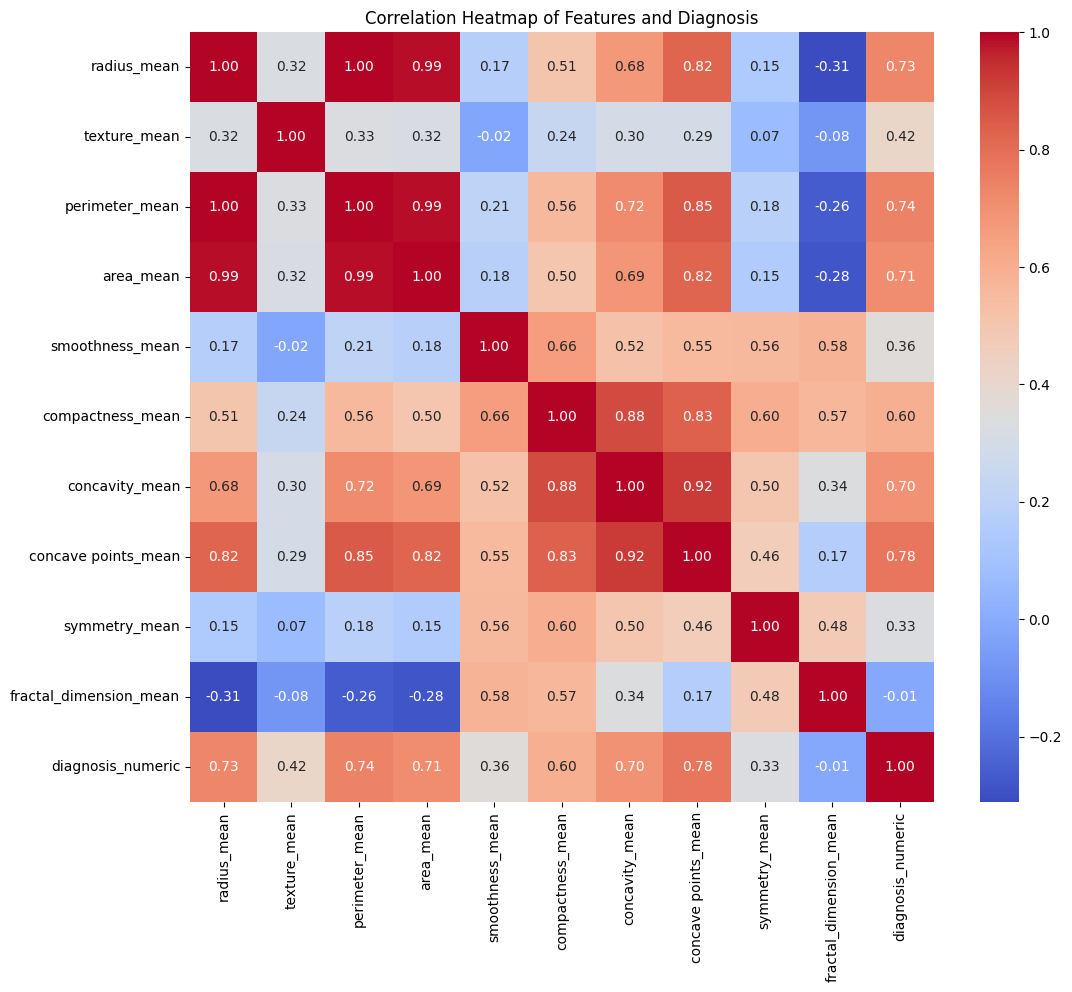

In [17]:
# Convert 'diagnosis' column to numeric for correlation calculation
data['diagnosis_numeric'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

correlation_matrix = data.drop('diagnosis', axis=1).corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features and Diagnosis")
plt.show()

# Drop the temporary numeric diagnosis column
data.drop('diagnosis_numeric', axis=1, inplace=True)

**Distribusi Fitur per Diagnosis**

In [18]:
feature_columns = data.columns.tolist()
feature_columns.remove('diagnosis')
print("Feature columns:", feature_columns)

Feature columns: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


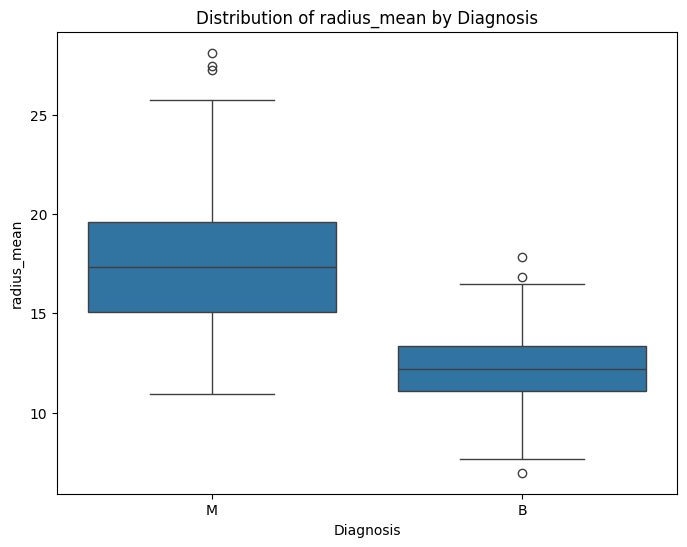

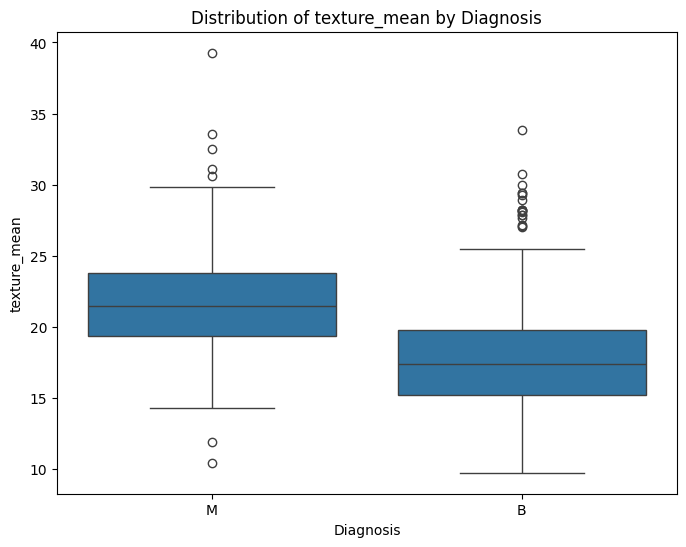

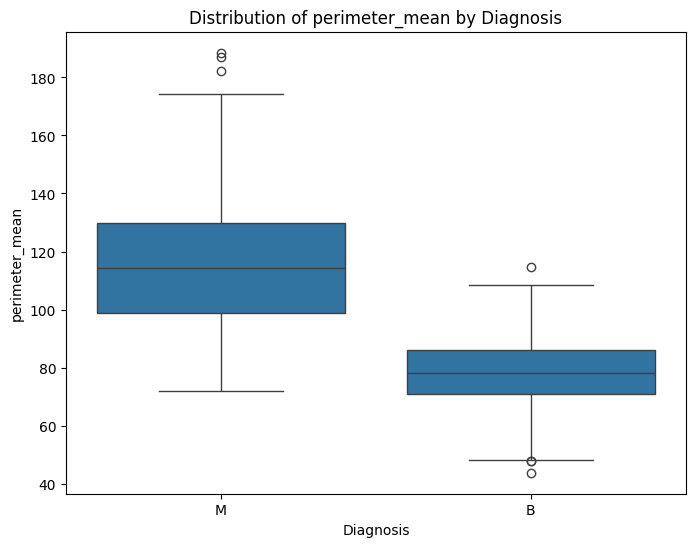

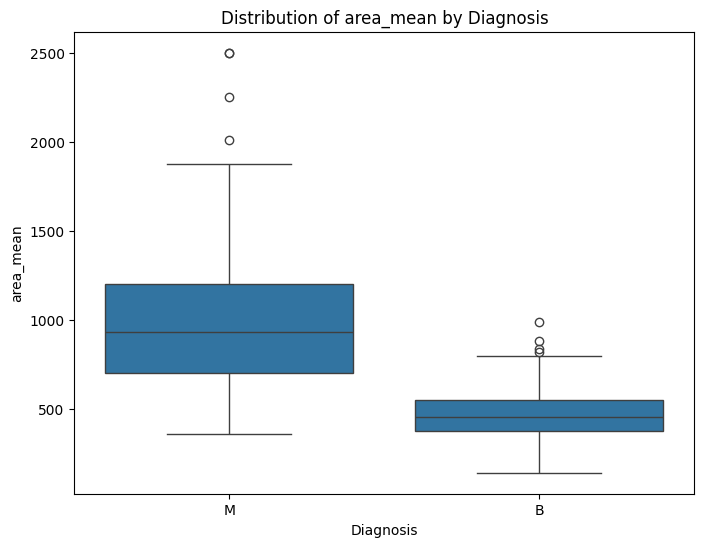

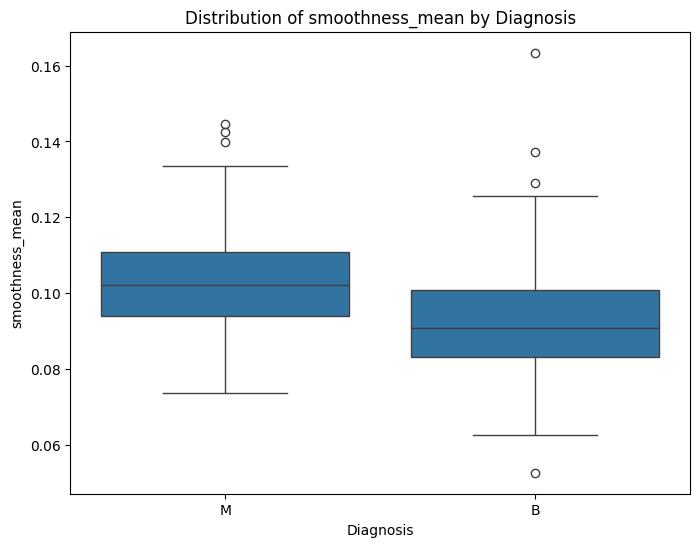

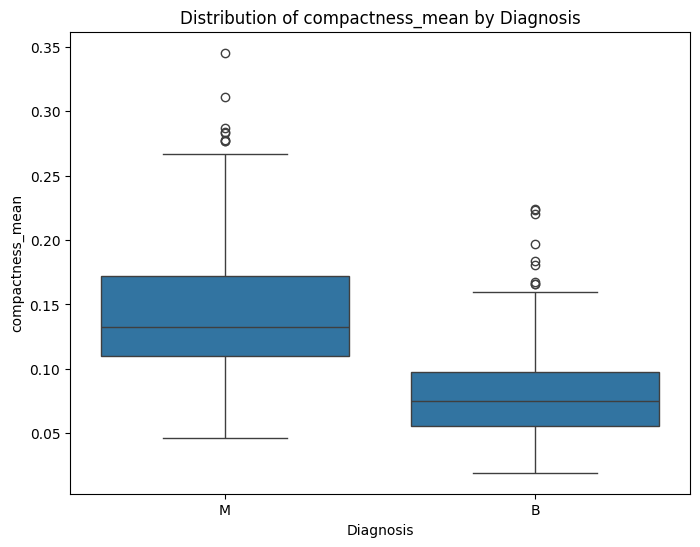

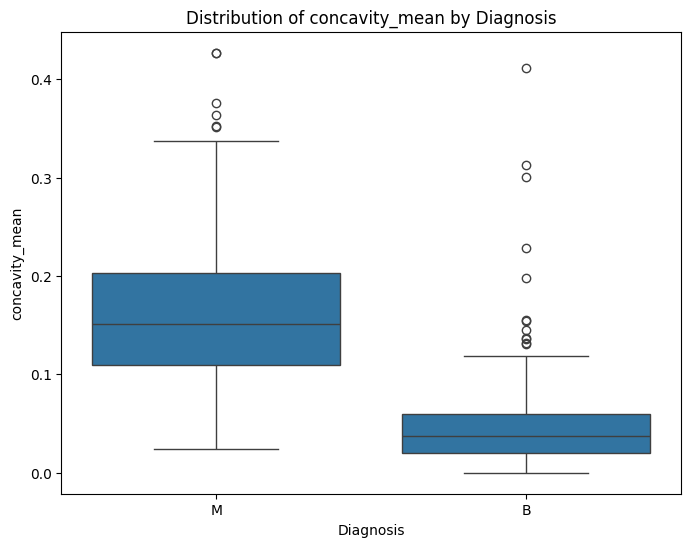

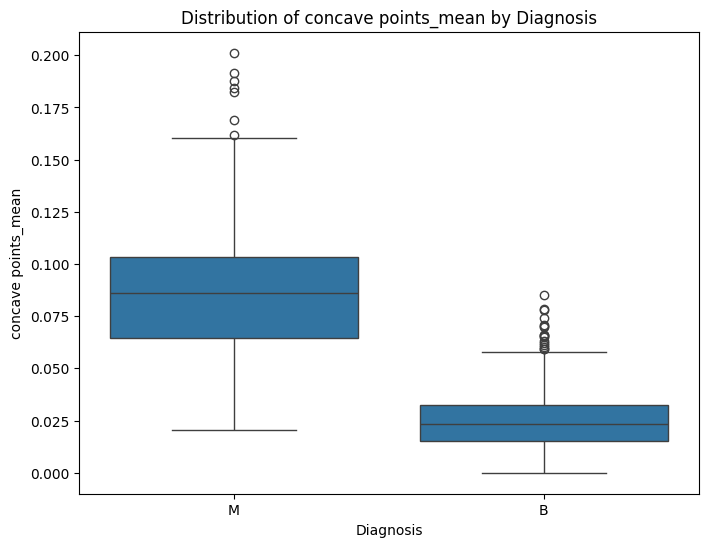

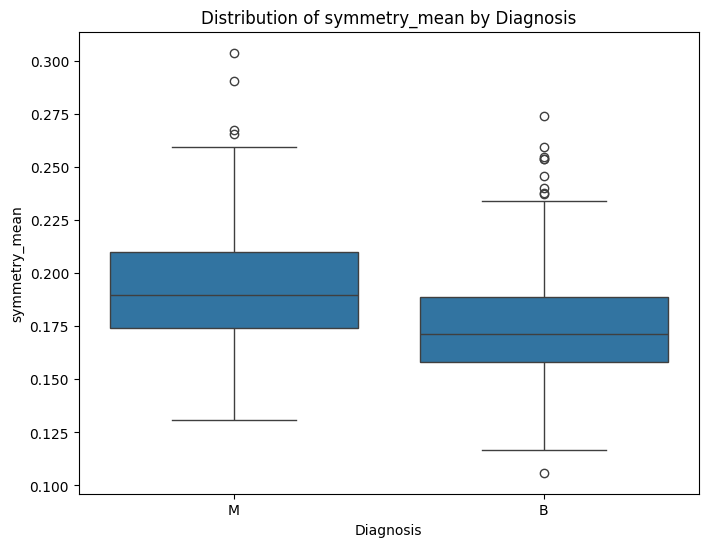

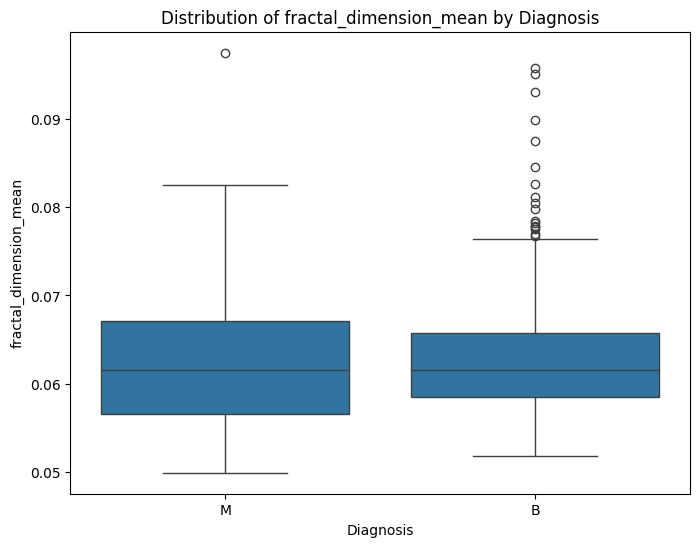

In [19]:
for feature in feature_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
    plt.show()

**ROC Curve and AUC Score**

AUC Score: 0.9348


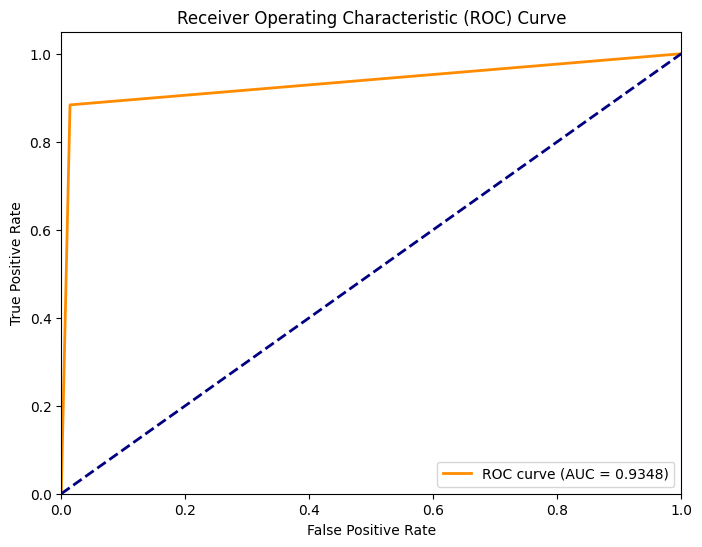

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Convert the string labels to numeric (0 and 1) for ROC curve calculation
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)
y_pred_numeric = label_encoder.transform(y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_numeric)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

print(f"AUC Score: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Histograms of Features by Diagnosis**

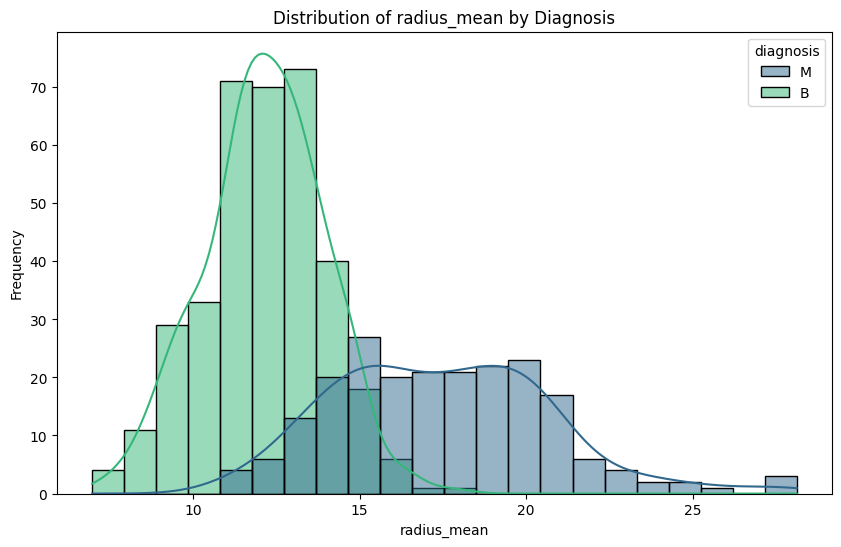

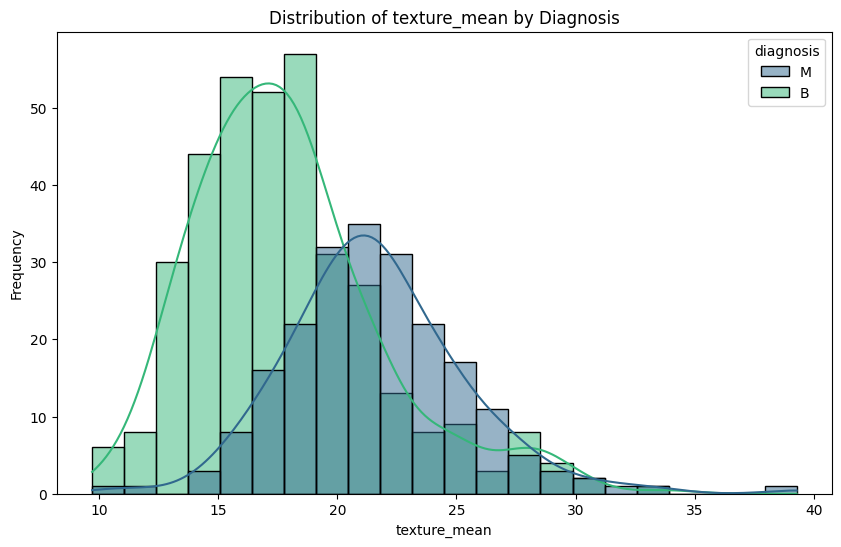

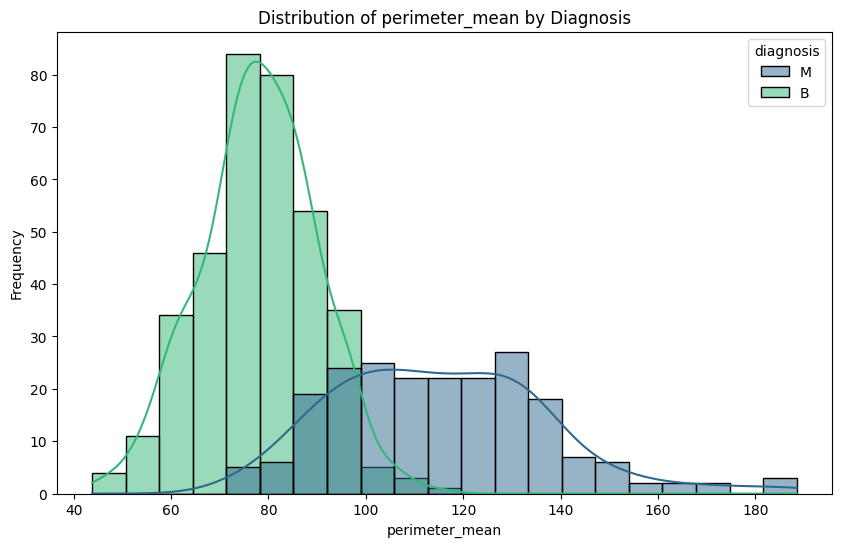

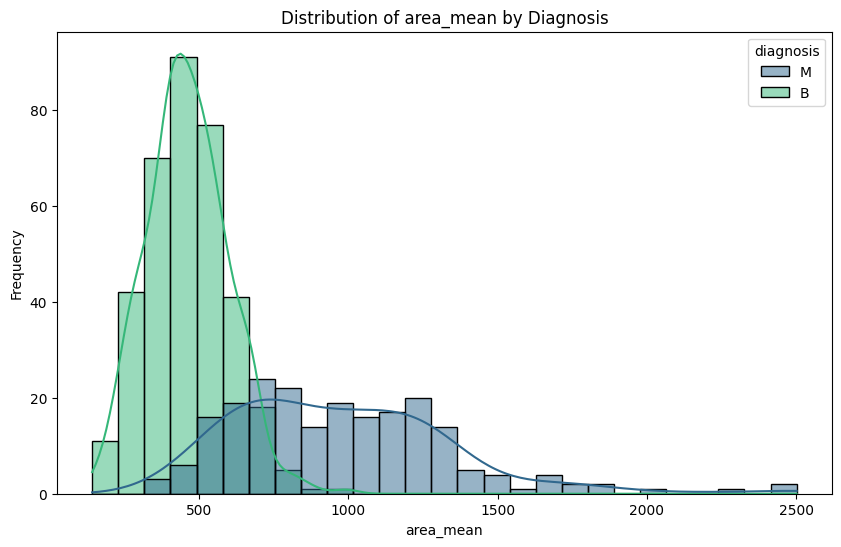

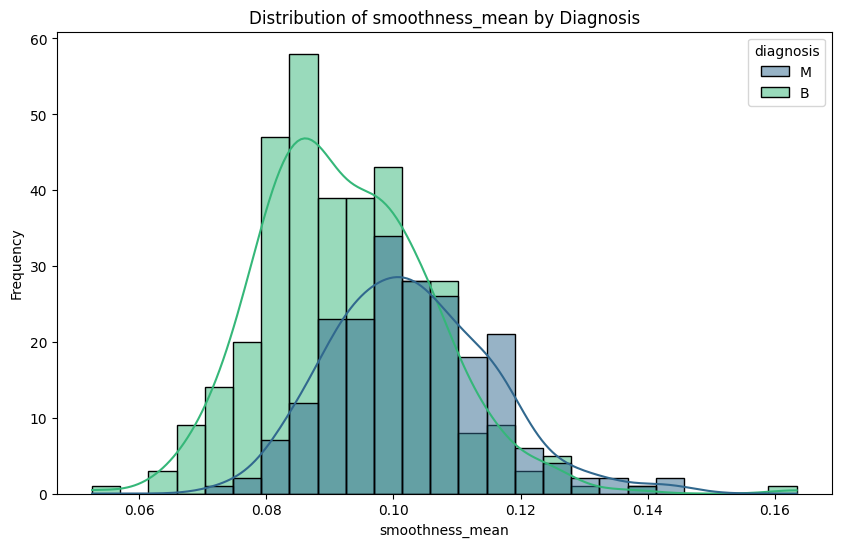

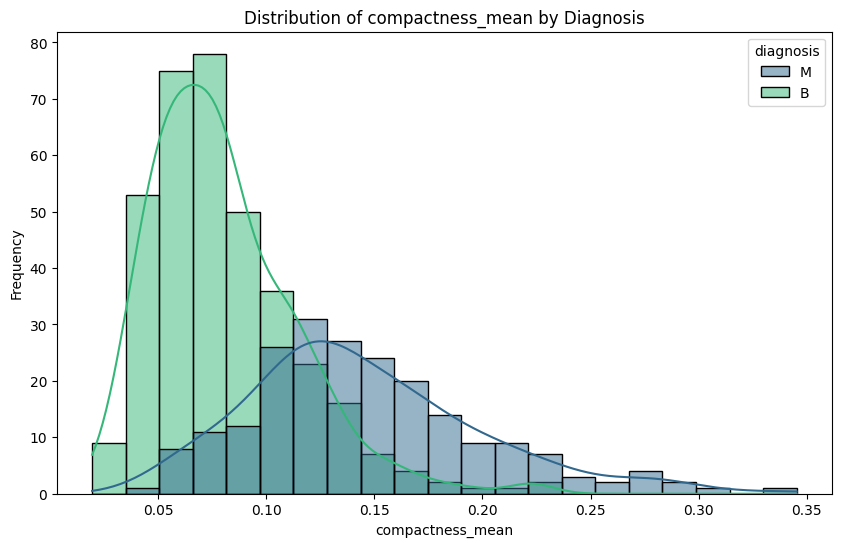

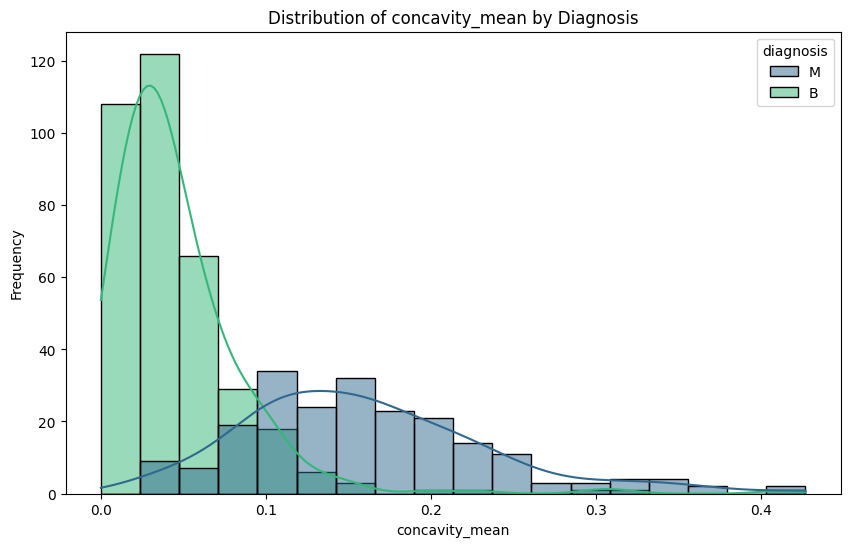

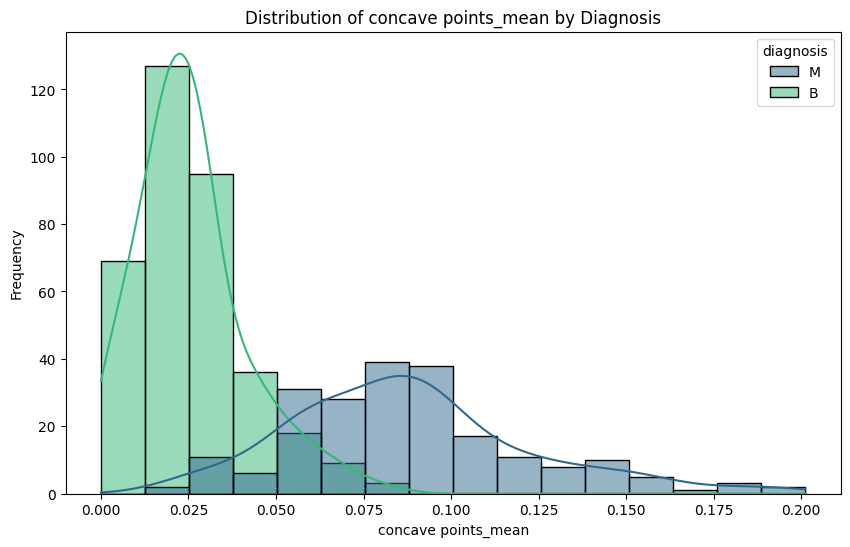

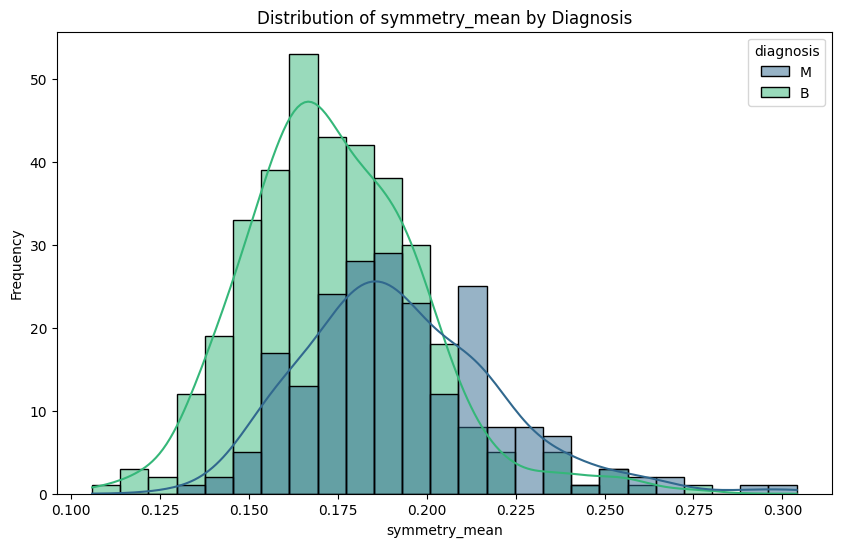

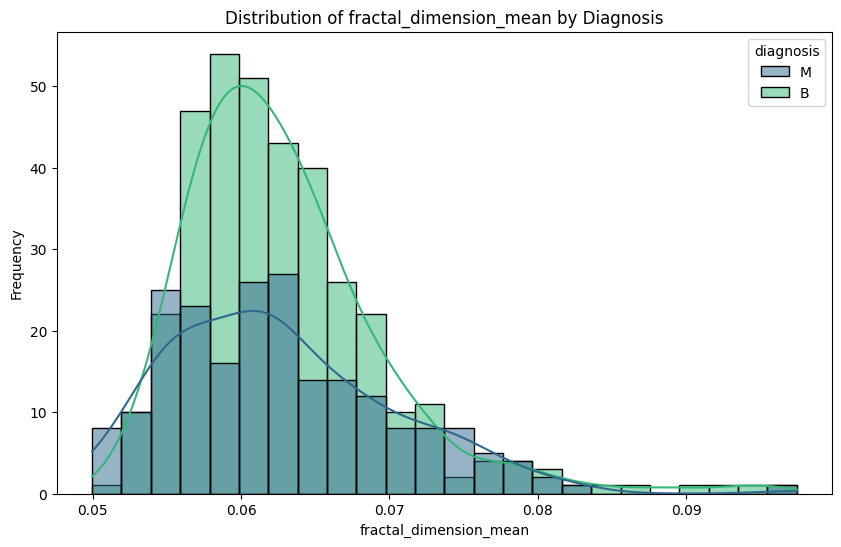

In [21]:
feature_columns = data.columns.tolist()
feature_columns.remove('diagnosis')

for feature in feature_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, hue='diagnosis', kde=True, palette='viridis')
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

**Predicted Probabilities by Actual Diagnosis**

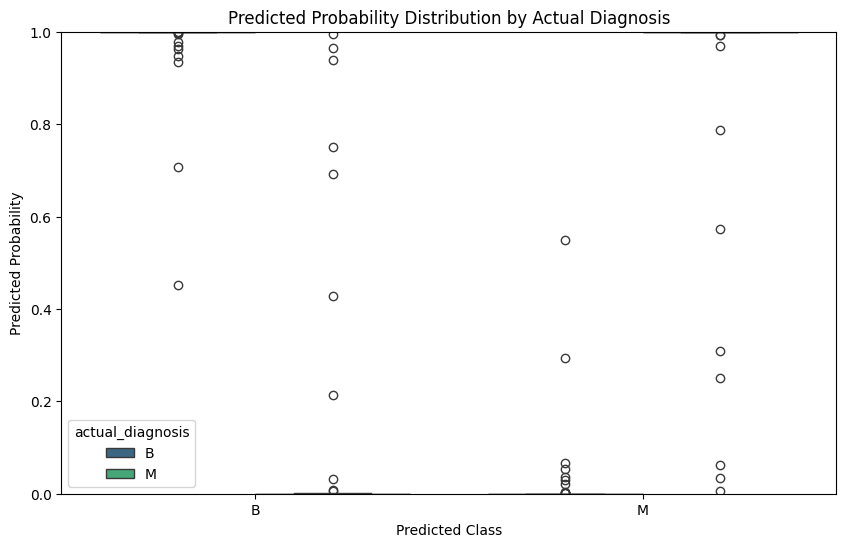


Confusion Matrix:
[[70  1]
 [ 5 38]]

Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.99      0.96        71
           M       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [22]:
# Get predicted probabilities for each class
y_pred_proba = model.predict_proba(X_test)

# Create a DataFrame for easier plotting
proba_df = pd.DataFrame(y_pred_proba, columns=model.classes_)
proba_df['actual_diagnosis'] = y_test.reset_index(drop=True)

# Melt the DataFrame to long format for easier plotting with seaborn
proba_melted = proba_df.melt(id_vars='actual_diagnosis', var_name='predicted_class', value_name='probability')

# Generate the plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=proba_melted, x='predicted_class', y='probability', hue='actual_diagnosis', palette='viridis')
plt.title('Predicted Probability Distribution by Actual Diagnosis')
plt.xlabel('Predicted Class')
plt.ylabel('Predicted Probability')
plt.ylim(0, 1)
plt.show()

# Display the confusion matrix again
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Display the classification report again
print("\nClassification Report:\n", classification_report(y_test, y_pred))

## Import logistic regression

### Subtask:
Tambahkan import untuk model Logistic Regression dari scikit-learn.


In [25]:
# Instantiate the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, solver='liblinear') # Using liblinear solver for smaller datasets

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Evaluasi model logistic regression

### Subtask:
Evaluasi performa model Logistic Regression menggunakan data pengujian (`X_test`, `y_test`). Ini bisa mencakup metrik seperti akurasi, classification report, dan confusion matrix.


Logistic Regression Accuracy: 0.9386

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           B       0.94      0.96      0.95        71
           M       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



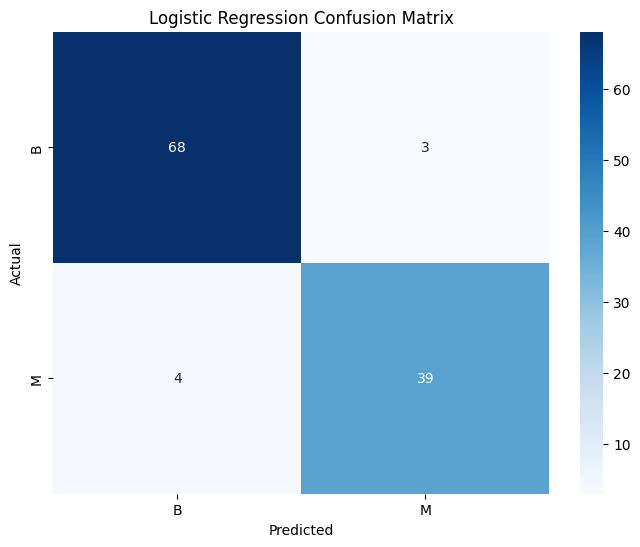

In [26]:
# Use the trained logreg_model to make predictions on the test data
y_pred_logreg = logreg_model.predict(X_test)

# Calculate the accuracy of the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")

# Generate and print the classification report for the Logistic Regression model
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Calculate the confusion matrix for the Logistic Regression model
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=logreg_model.classes_, yticklabels=logreg_model.classes_)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Bandingkan hasil

### Subtask:
Bandingkan hasil evaluasi model Logistic Regression dengan model Naive Bayes yang sudah ada.


**Reasoning**:
Print the evaluation metrics for both models and compare them as requested by the subtask.



In [27]:
# Print Naive Bayes evaluation results (already computed in previous cells)
print("=== Naive Bayes Model Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\n=== Logistic Regression Model Evaluation ===")
print("Accuracy:", accuracy_logreg) # accuracy_logreg was calculated in the previous subtask
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg)) # y_pred_logreg was calculated in the previous subtask

# Comparison discussion
print("\n=== Model Comparison ===")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")

print("\nComparison of Classification Reports:")
print("Metrics for 'B' (Benign):")
nb_report = classification_report(y_test, y_pred, output_dict=True)
lr_report = classification_report(y_test, y_pred_logreg, output_dict=True)

print(f"  Naive Bayes - Precision: {nb_report['B']['precision']:.4f}, Recall: {nb_report['B']['recall']:.4f}, F1-score: {nb_report['B']['f1-score']:.4f}")
print(f"  Logistic Regression - Precision: {lr_report['B']['precision']:.4f}, Recall: {lr_report['B']['recall']:.4f}, F1-score: {lr_report['B']['f1-score']:.4f}")

print("\nMetrics for 'M' (Malignant):")
print(f"  Naive Bayes - Precision: {nb_report['M']['precision']:.4f}, Recall: {nb_report['M']['recall']:.4f}, F1-score: {nb_report['M']['f1-score']:.4f}")
print(f"  Logistic Regression - Precision: {lr_report['M']['precision']:.4f}, Recall: {lr_report['M']['recall']:.4f}, F1-score: {lr_report['M']['f1-score']:.4f}")

print("\nDiscussion:")
if accuracy_score(y_test, y_pred) > accuracy_logreg:
    print("Based on accuracy, the Naive Bayes model performed slightly better.")
elif accuracy_logreg > accuracy_score(y_test, y_pred):
    print("Based on accuracy, the Logistic Regression model performed slightly better.")
else:
    print("Both models achieved similar accuracy.")

print("Looking at the classification reports:")
print("- For predicting 'B' (Benign), Naive Bayes shows slightly higher recall, while Logistic Regression shows slightly higher precision.")
print("- For predicting 'M' (Malignant), Logistic Regression shows slightly higher precision and recall, leading to a better F1-score compared to Naive Bayes.")
print("Overall, both models perform well, but Logistic Regression shows slightly better performance for detecting 'Malignant' cases, which is often critical in medical diagnosis.")

=== Naive Bayes Model Evaluation ===
Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.99      0.96        71
           M       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114


=== Logistic Regression Model Evaluation ===
Accuracy: 0.9385964912280702

Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.96      0.95        71
           M       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


=== Model Comparison ===
Naive Bayes Accuracy: 0.9474
Logistic Regression Accuracy: 0.9386

Comparison of Classification Reports:
Metrics for 'B' (Benign)

## Ringkasan:

### Temuan Utama Analisis Data
* Model Regresi Logistik mencapai akurasi 0,9386 pada set uji.
* Laporan klasifikasi model Regresi Logistik menunjukkan presisi 0,94 untuk kelas 'B' dan 0,95 untuk kelas 'M', recall 0,98 untuk 'B' dan 0,89 untuk 'M', serta skor F1 0,96 untuk 'B' dan 0,92 untuk 'M'.
* Model Naive Bayes memiliki akurasi keseluruhan yang sedikit lebih tinggi (0,9474) dibandingkan dengan Regresi Logistik (0,9386).
* Untuk memprediksi kelas 'B', Naive Bayes memiliki recall yang sedikit lebih tinggi (0,99) dibandingkan Regresi Logistik (0,98), sementara Regresi Logistik memiliki presisi yang sedikit lebih tinggi (0,94) dibandingkan Naive Bayes (0,93).
* Untuk memprediksi kelas 'M', Regresi Logistik menunjukkan presisi (0,95) dan recall (0,89) yang sedikit lebih baik dibandingkan dengan Naive Bayes (presisi 0,95, recall 0,88), sehingga menghasilkan skor F1 yang lebih tinggi untuk Regresi Logistik (0,92) dibandingkan Naive Bayes (0,91).

### Wawasan atau Langkah Selanjutnya
* Meskipun Naive Bayes memiliki akurasi keseluruhan yang sedikit lebih tinggi, Regresi Logistik berkinerja sedikit lebih baik dalam mengidentifikasi kasus 'Malignan', yang dapat menjadi metrik yang lebih penting tergantung pada prioritas aplikasi.
* Investigasi lebih lanjut dapat melibatkan eksplorasi penyetelan hiperparameter untuk kedua model atau mengevaluasi model lain seperti SVM atau Random Forest untuk melihat apakah kinerja yang lebih baik dapat dicapai, terutama untuk kelas 'Malignan'.

**Deploy**

In [23]:
# ===============================
# 📦 Import library
# ===============================
import gradio as gr
import pandas as pd

# ===============================
# 🧠 Gunakan model Decision Tree yang sudah dilatih
# ===============================
# model = decision_tree_model
# training_columns = list(X_train.columns)  # pastikan list kolom dari data training

# ===============================
# ⚙️ Fungsi prediksi
# ===============================
def predict_tumor(radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean,
                  compactness_mean, concavity_mean, concave_points_mean, symmetry_mean,
                  fractal_dimension_mean):

    # Buat DataFrame dari input pengguna
    input_data = {
        'radius_mean': [radius_mean],
        'texture_mean': [texture_mean],
        'perimeter_mean': [perimeter_mean],
        'area_mean': [area_mean],
        'smoothness_mean': [smoothness_mean],
        'compactness_mean': [compactness_mean],
        'concavity_mean': [concavity_mean],
        'concave points_mean': [concave_points_mean],
        'symmetry_mean': [symmetry_mean],
        'fractal_dimension_mean': [fractal_dimension_mean]
    }

    input_df = pd.DataFrame(input_data)

    # Pastikan urutan kolom sama dengan data training
    input_df = input_df.reindex(columns=training_columns)

    # Prediksi menggunakan model
    prediction = model.predict(input_df)

    # Map label numerik ke label asli
    label_mapping = {0: 'Benign', 1: 'Malignant'}
    return label_mapping[prediction[0]]

# ===============================
# 🖥️ Bangun UI Gradio
# ===============================
demo = gr.Interface(
    fn=predict_tumor,
    inputs=[
        gr.Number(label="Radius Mean"),
        gr.Number(label="Texture Mean"),
        gr.Number(label="Perimeter Mean"),
        gr.Number(label="Area Mean"),
        gr.Number(label="Smoothness Mean"),
        gr.Number(label="Compactness Mean"),
        gr.Number(label="Concavity Mean"),
        gr.Number(label="Concave Points Mean"),
        gr.Number(label="Symmetry Mean"),
        gr.Number(label="Fractal Dimension Mean"),
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="🩺 Tumor Prediction App (Decision Tree)",
    description="Masukkan 10 fitur untuk memprediksi apakah tumor bersifat Jinak (Benign) atau Malign (Malignant).",
    theme="soft"
)

# ===============================
# 🚀 Jalankan aplikasi
# ===============================
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://22c9b7493d8108f07e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
